In [1]:
#IMPORTACIÓN DE LIBRERIAS
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('ggplot') 

In [2]:
#LECTURA DE DATASET
ratings = pd.read_csv('ratings.csv')

In [4]:
#DESCRIPCIÓN GENERAL DE LOS DATOS
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


<AxesSubplot: xlabel='rating', ylabel='count'>

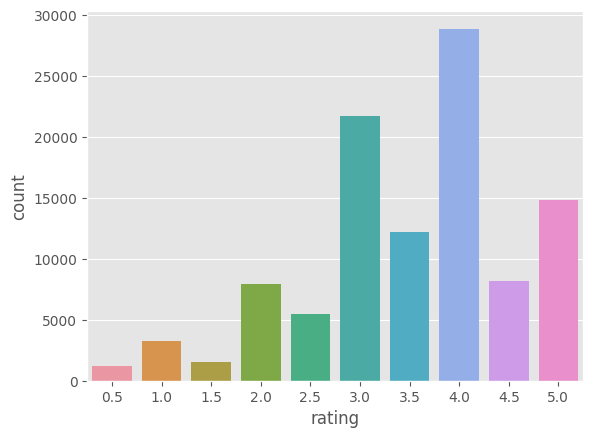

In [5]:
#REPRESENTACIÓN GRÁFICA DE CONTEO CAMPO 'rating'
sns.countplot(x='rating', data=ratings)

In [6]:
#LECTURA DE DATASET
movies = pd.read_csv('movies.csv')

In [8]:
#VISUALIZACIÓN GENRAL DE LOS DATOS
movies.describe(include='all')

,movieId,title,genres
count,10329.000000,10329,10329
unique,NaN,10327,938
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1385
mean,31924.282893,NaN,NaN
std,37734.741149,NaN,NaN
min,1.000000,NaN,NaN
25%,3240.000000,NaN,NaN
50%,7088.000000,NaN,NaN
75%,59900.000000,NaN,NaN


In [9]:
#UNIÓN DE LOS DATASETS POR EL CAMPO 'movieId'
rated_movies = ratings.merge(movies, left_on='movieId', right_on='movieId')[['userId', 'movieId', 'title', 'rating']]

In [10]:
rated_movies.head()

,userId,movieId,title,rating
0,1,16,Casino (1995),4.0
1,9,16,Casino (1995),4.0
2,12,16,Casino (1995),1.5
3,24,16,Casino (1995),4.0
4,29,16,Casino (1995),3.0


In [11]:
#OBTENCIÓN DE PROMEDIO DE CALIFICACIÓN POR PELICULA
mean_ratings = rated_movies.pivot_table(index='title', values='rating', aggfunc=[len, np.mean])

In [15]:
mean_ratings.head()

,ratings_count,mean_rating
title,,
'71 (2014),1,3.500
'Hellboy': The Seeds of Creation (2004),1,3.000
'Round Midnight (1986),1,2.500
'Til There Was You (1997),3,4.000
"'burbs, The (1989)",20,3.125


In [13]:
mean_ratings.columns = ['ratings_count', 'mean_rating']

In [14]:
mean_ratings.head()

,ratings_count,mean_rating
title,,
'71 (2014),1,3.500
'Hellboy': The Seeds of Creation (2004),1,3.000
'Round Midnight (1986),1,2.500
'Til There Was You (1997),3,4.000
"'burbs, The (1989)",20,3.125


In [16]:
#ORDENAMIENTO DESCENDENTE POR CAMPO 'rating'
mean_ratings.sort_values(by='mean_rating', ascending=False).head(10)

,ratings_count,mean_rating
title,,
"Saddest Music in the World, The (2003)",1,5.0
Interstate 60 (2002),2,5.0
"Gunfighter, The (1950)",1,5.0
Heima (2007),1,5.0
Limelight (1952),1,5.0
"Plague Dogs, The (1982)",1,5.0
Love Me If You Dare (Jeux d'enfants) (2003),1,5.0
Syrup (2013),1,5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003),1,5.0


In [17]:
mean_ratings[mean_ratings['ratings_count'] > 100].sort_values(by='mean_rating', ascending=False).head(10)

,ratings_count,mean_rating
title,,
"Shawshank Redemption, The (1994)",308,4.454545
"Godfather, The (1972)",210,4.392857
"Usual Suspects, The (1995)",228,4.328947
Monty Python and the Holy Grail (1975),154,4.301948
Schindler's List (1993),248,4.296371
One Flew Over the Cuckoo's Nest (1975),143,4.272727
Fargo (1996),201,4.271144
"Matrix, The (1999)",261,4.264368
"Godfather: Part II, The (1974)",140,4.260714


In [19]:
mean_ratings[mean_ratings.index.str.contains('Indiana Jones')]

,ratings_count,mean_rating
title,,
Indiana Jones and the Kingdom of the Crystal Skull (2008),26,2.673077
Indiana Jones and the Last Crusade (1989),167,4.071856
Indiana Jones and the Temple of Doom (1984),109,3.743119
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),224,4.212054


Collaborative Filtering

In [20]:
rated_movies.head()

,userId,movieId,title,rating
0,1,16,Casino (1995),4.0
1,9,16,Casino (1995),4.0
2,12,16,Casino (1995),1.5
3,24,16,Casino (1995),4.0
4,29,16,Casino (1995),3.0


In [21]:
#TABLA PIVOTE QUE RELACIONA USUARIOS Y SHOW A TRAVES DE LAS CALIFICACIONES OTORGADAS A LOS DIFERENTES CONTENIDOS
ratings_pivot = rated_movies.pivot_table(index='userId', columns='title', values='rating', aggfunc=np.mean)

In [23]:
ratings_pivot.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 1 to 668
Columns: 10323 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
dtypes: float64(10323)
memory usage: 52.6 MB


In [24]:
#LLENADO DE ESPACIOS NaN - CONTENIDO NO CONSUMIDO POR ESE USUARIO
ratings_pivot.fillna(0, inplace=True)

In [25]:
#VISUALIZACIÓN GENERAL
ratings_pivot.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#GENERACIÓN MATRIZ DISPERSA PARA OPTIMIZACIÓN DE MANEJO EN MEMORIA
sparse_ratings = sp.sparse.csr_matrix(ratings_pivot.values)

In [27]:
sparse_ratings

<668x10323 sparse matrix of type '<class 'numpy.float64'>'
	with 105335 stored elements in Compressed Sparse Row format>

In [28]:
#APLICACIÓN MODELO DE 'cosine similarity' PARA ESTABLECER LA SIMILITUD ENTRE USUARIOS Y CONTENIDOS ENTRE SI
user_similarity = cosine_similarity(sparse_ratings)
item_similarity = cosine_similarity(sparse_ratings.T)

In [29]:
user_similarity

array([[1.        , 0.10111327, 0.21004361, ..., 0.2386603 , 0.27821676,
        0.15349255],
       [0.10111327, 1.        , 0.11555911, ..., 0.05142323, 0.03590744,
        0.06482201],
       [0.21004361, 0.11555911, 1.        , ..., 0.08094014, 0.15894346,
        0.10965801],
       ...,
       [0.2386603 , 0.05142323, 0.08094014, ..., 1.        , 0.12325229,
        0.15838263],
       [0.27821676, 0.03590744, 0.15894346, ..., 0.12325229, 1.        ,
        0.11096494],
       [0.15349255, 0.06482201, 0.10965801, ..., 0.15838263, 0.11096494,
        1.        ]])

In [30]:
#GENERACIÓN DATAFRAME DE RESULTADOS (user)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [31]:
user_similarity_df.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153493
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064822
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109658
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157809
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068281
6,0.077130,0.028305,0.012816,0.005781,0.053378,1.000000,0.099185,0.024964,0.010270,0.054996,...,0.127224,0.000000,0.013365,0.044321,0.000000,0.011697,0.131016,0.068479,0.031558,0.089924
7,0.358090,0.062914,0.084522,0.059089,0.080822,0.099185,1.000000,0.095269,0.175259,0.023508,...,0.262165,0.032474,0.056672,0.090357,0.156616,0.207565,0.178275,0.174009,0.195029,0.142918
8,0.097434,0.471918,0.066620,0.024420,0.041536,0.024964,0.095269,1.000000,0.125359,0.000000,...,0.071863,0.000000,0.463570,0.127556,0.115398,0.070784,0.033969,0.039911,0.119225,0.074916
9,0.239189,0.194232,0.459703,0.050572,0.023168,0.010270,0.175259,0.125359,1.000000,0.054854,...,0.174802,0.264366,0.123233,0.147766,0.389503,0.098666,0.116292,0.084109,0.169818,0.110906


In [32]:
#GENERACIÓN DATAFRAME DE RESULTADOS (show)
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_pivot.columns, columns=ratings_pivot.columns)

In [34]:
item_similarity_df.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158272,0.000000,0.098324,0.000000
'Hellboy': The Seeds of Creation (2004),0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147486,0.000000
'Round Midnight (1986),0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.000000,0.100219,0.000000,0.221581,0.000000,0.098324,1.000000
'Til There Was You (1997),0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"'burbs, The (1989)",0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.000000,0.212684,0.000000,0.104192,0.000000,0.161820,0.000000
'night Mother (1986),0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.141915,0.000000,0.257012,0.680414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189927,0.000000,0.098324,0.000000
(500) Days of Summer (2009),0.000000,0.0,0.081094,0.0,0.031610,0.141915,1.000000,0.048525,0.088579,0.151738,...,0.053699,0.093753,0.151957,0.162188,0.138162,0.202735,0.232954,0.225606,0.089702,0.081094
*batteries not included (1987),0.000000,0.0,0.000000,0.0,0.231897,0.000000,0.048525,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.108833,0.000000,0.000000,0.000000,0.137282,0.000000
...And Justice for All (1979),0.342682,0.0,0.257012,0.0,0.100923,0.257012,0.088579,0.000000,1.000000,0.349749,...,0.000000,0.058452,0.036347,0.000000,0.077273,0.000000,0.214237,0.113833,0.134776,0.257012


In [39]:
#PRUEBA DE SIMILITUD POR SHOW
item_similarity_df['...And Justice for All (1979)'].sort_values(ascending=False)

title
...And Justice for All (1979)                           1.000000
General, The (1998)                                     0.604833
Enforcer, The (1976)                                    0.602939
Mesrine: Killer Instinct (L'instinct de mort) (2008)    0.598745
Last Seduction, The (1994)                              0.536099
                                                          ...   
Mothman Prophecies, The (2002)                          0.000000
Mothra (Mosura) (1961)                                  0.000000
Mouchette (1967)                                        0.000000
Movie 43 (2013)                                         0.000000
Lady Snowblood (Shurayukihime) (1973)                   0.000000
Name: ...And Justice for All (1979), Length: 10323, dtype: float64

In [40]:
#SE DECLARA UNA FUNCIÓN QUE RECIBE UN 'show' Y DEVUELVE SHOWS SIMILARES QUE PUEDEN INTERESAR AL USUARIO
def top_movies(title):
    count = 1
    print('Similar shows to {} include:'.format(title))
    for movie in item_similarity_df.sort_values(by=title, ascending=False).index[1:11]:
        print('No. {}: {}'.format(count, movie))
        count += 1

In [41]:
top_movies('(500) Days of Summer (2009)')

Similar shows to (500) Days of Summer (2009) include:
No. 1: Scott Pilgrim vs. the World (2010)
No. 2: Up in the Air (2009)
No. 3: Social Network, The (2010)
No. 4: Forgetting Sarah Marshall (2008)
No. 5: Shutter Island (2010)
No. 6: Juno (2007)
No. 7: I Love You, Man (2009)
No. 8: Knocked Up (2007)
No. 9: Inception (2010)
No. 10: Slumdog Millionaire (2008)


In [43]:
top_movies('Social Network, The (2010)')

Similar shows to Social Network, The (2010) include:
No. 1: Funny People (2009)
No. 2: Black Swan (2010)
No. 3: Slumdog Millionaire (2008)
No. 4: Fighter, The (2010)
No. 5: I Love You, Man (2009)
No. 6: Scott Pilgrim vs. the World (2010)
No. 7: Forgetting Sarah Marshall (2008)
No. 8: Inglourious Basterds (2009)
No. 9: Milk (2008)
No. 10: (500) Days of Summer (2009)


In [44]:
top_movies('Inglourious Basterds (2009)')

Similar shows to Inglourious Basterds (2009) include:
No. 1: Shutter Island (2010)
No. 2: Django Unchained (2012)
No. 3: Dark Knight, The (2008)
No. 4: Inception (2010)
No. 5: Departed, The (2006)
No. 6: Dark Knight Rises, The (2012)
No. 7: Hangover, The (2009)
No. 8: Gran Torino (2008)
No. 9: Watchmen (2009)
No. 10: Zombieland (2009)


In [45]:
#SE DECLARA UNA FUNCIÓN QUE RECIBE UN 'user' Y DEVUELVE USUARIOS SIMILARES QUE CALIFICARON DETERMINADO CONTENIDO
def top_users(user):
    count = 1
    print('Similar users to {} include:'.format(user))
    similar_indexes = user_similarity_df.sort_values(by=user, ascending=False).index[1:11]
    similar_values = user_similarity_df.sort_values(by=user, ascending=False).loc[:, user].tolist()[1:11]
    for user, sim in zip(similar_indexes, similar_values):
        print('No. {}: {}. Similarity {}'.format(count, user, sim))
        count += 1

In [60]:
#SIMILITUD POR USUARIOS
top_users(2)

Similar users to 2 include:
No. 1: 96. Similarity 0.7558831522705319
No. 2: 648. Similarity 0.6830342958838423
No. 3: 536. Similarity 0.5995681049080985
No. 4: 151. Similarity 0.5585912018031987
No. 5: 572. Similarity 0.5485046247948242
No. 6: 271. Similarity 0.5354749376207809
No. 7: 165. Similarity 0.5322639182583243
No. 8: 595. Similarity 0.525719189442095
No. 9: 93. Similarity 0.5256231308392426
No. 10: 379. Similarity 0.5156706730466898


In [62]:
ratings[ratings['userId'] == 2].head(10)

,userId,movieId,rating,timestamp
113,2,1,5.0,859046895
114,2,3,2.0,859046959
115,2,5,3.0,859046959
116,2,14,4.0,859047091
117,2,17,5.0,859046896
118,2,25,3.0,859046896
119,2,32,3.0,859046895
120,2,36,5.0,859046959
121,2,52,4.0,859047004
122,2,58,4.0,859047004


In [63]:
ratings[ratings['userId'] == 96].head(10)

,userId,movieId,rating,timestamp
11081,96,1,5.0,857048677
11082,96,3,4.0,857048737
11083,96,5,3.0,857048736
11084,96,6,4.0,857048736
11085,96,7,3.0,857048737
11086,96,9,1.0,857048880
11087,96,14,3.0,857048837
11088,96,17,2.0,857048678
11089,96,25,3.0,857048678
11090,96,36,5.0,857048736
